<a href="https://colab.research.google.com/github/andrewberryy/LSTM-Time-Series-Prediction-CCE/blob/main/LSTM_Vanilla_Network_Emulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as pd
import pandas as pd


file_location = 'https://raw.githubusercontent.com/andrewberryy/Datasets/master/throughput_scream_60_TMobileLTE.csv'

first_dataset = pd.read_csv(file_location)

first_dataset.head() 

,Time,Throughput
0,5.0,0.018176
1,5.5,0.055136
2,6.0,0.038448
3,6.5,0.025552
4,7.0,0.012480


In [2]:
first_dataset_indexed = first_dataset.set_index(['Time'])
#first_dataset_indexed.head()

<Axes: xlabel='Time'>

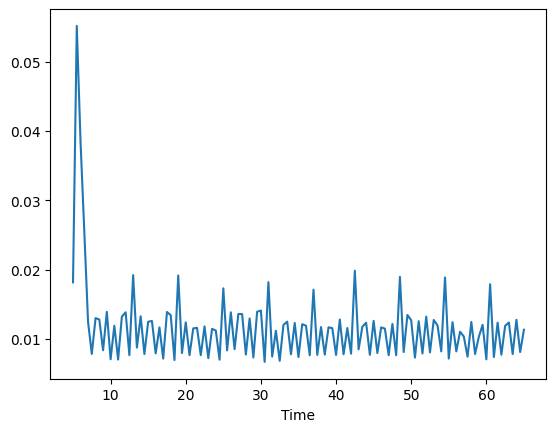

In [3]:
throughput = first_dataset_indexed["Throughput"]
throughput.plot()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
first_dataset_scaled = scaler.fit_transform(first_dataset_indexed)


In [5]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(first_dataset_scaled, test_size = 0.10, shuffle = False)

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input = 3
n_features = 1

generatorTrain = TimeseriesGenerator(train, train, length=n_input, batch_size=2)
generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [7]:
batch_0 = generatorTrain[0]
x ,y = batch_0
#print(x,y)

In [8]:
#number of samples
print("Samples: %d" % len(generatorTrain))
#print each sample
for i in range(len(generatorTrain)):
  x, y = generatorTrain[i]
  #print('%s => %s' % (x , y))

Samples: 53


In [9]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 

In [10]:

# create and fit the LSTM network
model = Sequential()
#arctan sigmoid activation
#try differnet dropouts
#grid search 
model.add(LSTM(300, activation = 'sigmoid',input_shape=(n_input, n_features)))
model.add(Dense(1))
# soft max label
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300)               362400    
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='mse')
model.fit(generatorTrain, epochs=100, batch_size=15, shuffle=False)


Epoch 1/100
53/53 [==============================] - 3s 20ms/step - loss: 0.0166
Epoch 2/100
53/53 [==============================] - 1s 20ms/step - loss: 0.0081
Epoch 3/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0079
Epoch 4/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 5/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0081
Epoch 6/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0079
Epoch 7/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0076
Epoch 8/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0074
Epoch 9/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0072
Epoch 10/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0071
Epoch 11/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 12/100
53/53 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 13/100
53/53 [=====

In [12]:
import numpy as np

predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
#print(current_batch)

for i in range(len(test)):
  #get the prediction value for first
  current_pred = model.predict(current_batch)[0]

  #append the prediction into array
  predictions.append(current_pred)

  #remove the first value
  current_batch_rmv_frist = current_batch[:,1:,:]
  #update the batch
  current_batch = np.append(current_batch_rmv_frist,[[current_pred]],axis=1)

#print([i[0] for i in predictions])


1/1 [==============================] - 0s 39ms/step


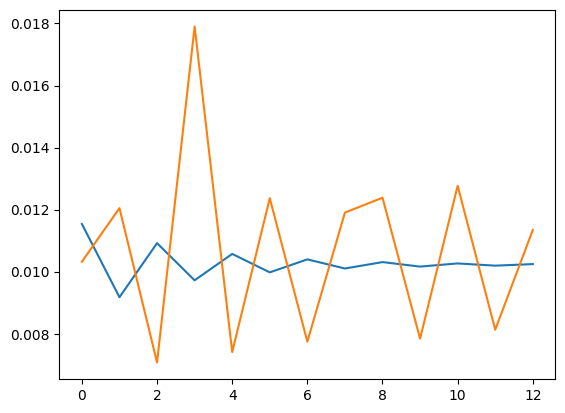

In [13]:
import matplotlib.pyplot as plt

predictions_actual_size = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_size)
plt.plot(test_data_actual_scale)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

mean_squared_error(test,predictions)
acuracy_score(test,predictions)

NameError: ignored

In [ ]:
import pickle

#save
with open('VanillaEpoch300.pkl','wb') as f:
  pickle.dump(model,f)